In [1]:
# 필요한 라이브러리 불러오기
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import missingno as msno

import pandas as pd # Analysis 
import numpy as np  # Analysis 

import matplotlib.pyplot as plt  # Visulization
import seaborn as sns  # Visulization

from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

from sklearn.preprocessing import LabelEncoder

In [2]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/covid'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/covid/SeoulFloating.csv
/content/drive/MyDrive/covid/Weather.csv
/content/drive/MyDrive/covid/naver_stock.csv
/content/drive/MyDrive/covid/Case.csv
/content/drive/MyDrive/covid/PatientInfo.csv
/content/drive/MyDrive/covid/Policy.csv
/content/drive/MyDrive/covid/Region.csv
/content/drive/MyDrive/covid/SearchTrend.csv
/content/drive/MyDrive/covid/Time (1).csv
/content/drive/MyDrive/covid/TimeAge.csv
/content/drive/MyDrive/covid/TimeGender (1).csv
/content/drive/MyDrive/covid/TimeProvince.csv
/content/drive/MyDrive/covid/coronavirus-in-s-korea-data-visualization.ipynb


In [3]:
patientinfo = pd.read_csv("/content/drive/MyDrive/covid/PatientInfo.csv")
#patientinfo = pd.read_csv("/content/drive/MyDrive/covid/TimeAge.csv")
#patientinfo = pd.read_csv("/content/drive/MyDrive/covid/Region.csv")

# Correlation between patients and variables by age

1. 사용할 컬럼만 추출(사용할 컬럼 : 0, 2, 4, 5, 6, 8)
2. 결측치 처리
3. 데이터 변환
4. 나이별 환자와 변수들관의 상관관계

In [4]:
train1 = patientinfo

- 사용할 컬럼만 추출(사용할 컬럼 : 0, 2, 4, 5, 6, 8)

In [5]:
train1_1 = train1.loc[:, ['patient_id','province','city','infected_by','contact_number','age']]

- 결측치 처리
- 데이터 변환

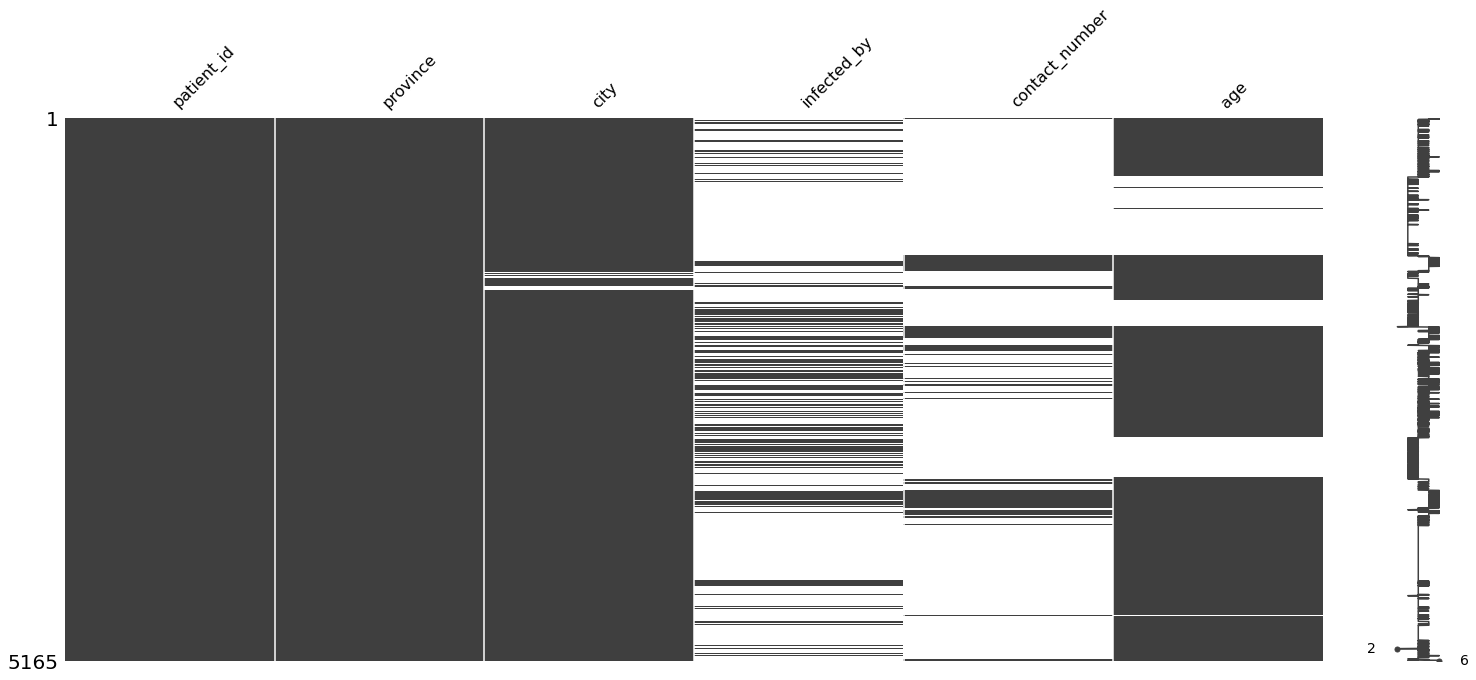

In [6]:
msno.matrix(train1_1)

In [7]:
train1_1.isnull()

,patient_id,province,city,infected_by,contact_number,age
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5160,False,False,False,True,False,False
5161,False,False,False,True,True,True
5162,False,False,False,True,False,True
5163,False,False,False,True,True,True


In [8]:
train1_1['age'] = train1_1['age'].str.replace('s', '')

In [9]:
train1_11 = train1_1.copy()

train1_11['contact_number'] = train1_11['contact_number'].fillna('0')
train1_11['contact_number'] = train1_11['contact_number'].str.replace('-', '0')
train1_11['contact_number'].astype(int)
train1_11['contact_number'] = train1_11['contact_number'].astype(int)

train1_111 = train1_11.drop(3728)

train1_111['infected_by'] = train1_111['infected_by'].fillna('0')
train1_111['infected_by'] = train1_111['infected_by'].str.replace('-', '0')
train1_111['infected_by'].astype(int)
train1_111['infected_by'] = train1_111['infected_by'].astype(int)

In [10]:
X = train1_111.dropna(axis=0)[['contact_number','infected_by']]
y = train1_111.dropna(axis=0)['age']

lin_reg_model = lin_reg.fit(X, y)

y_pred = lin_reg_model.predict(train1_111.loc[:, ['contact_number', 'infected_by']])
y_pred

array([40.01499447, 40.01499433, 40.55951594, ..., 40.01499446,
       40.01499423, 40.01499423])

In [11]:
train1_111['age'].fillna(pd.Series(y_pred.flatten()), inplace=True)
train1_1111 = train1_111.drop(5164)

train1_1111

,patient_id,province,city,infected_by,contact_number,age
0,1000000001,Seoul,Gangseo-gu,0,75,50
1,1000000002,Seoul,Jungnang-gu,0,31,30
2,1000000003,Seoul,Jongno-gu,2002000001,17,50
3,1000000004,Seoul,Mapo-gu,0,9,20
4,1000000005,Seoul,Seongbuk-gu,1000000002,2,20
...,...,...,...,...,...,...
5159,7000000014,Jeju-do,Jeju-do,0,140,30
5160,7000000015,Jeju-do,Jeju-do,0,25,30
5161,7000000016,Jeju-do,Jeju-do,0,0,40.014994
5162,7000000017,Jeju-do,Jeju-do,0,72,40.014994


In [12]:
train1_1111['age'].astype(int)
train1_1111['age'] = train1_1111['age'].astype(int)

In [13]:
pd.unique(train1_1111['province'])

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [14]:
train1_1111['province'].describe()

count      5163
unique       17
top       Seoul
freq       1312
Name: province, dtype: object

In [15]:
train1_1111['province'].value_counts()

Seoul                1312
Gyeongsangbuk-do     1254
Gyeonggi-do          1208
Incheon               343
Chungcheongnam-do     168
Busan                 151
Daegu                 137
Gyeongsangnam-do      133
Daejeon               119
Gangwon-do             63
Chungcheongbuk-do      56
Ulsan                  55
Sejong                 51
Gwangju                44
Jeollabuk-do           26
Jeollanam-do           25
Jeju-do                18
Name: province, dtype: int64

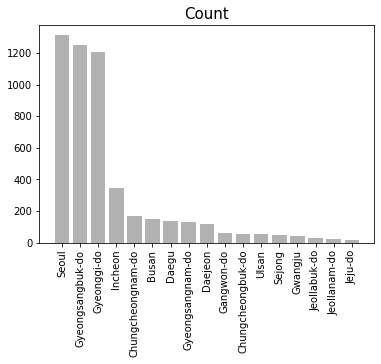

In [16]:
bar_df = train1_1111["province"].value_counts().reset_index()
plt.title("Count", fontsize=15)
plt.bar(bar_df["index"], bar_df["province"],color='k', alpha=.3)
#plt.ylabel("Province Volume", fontsize=12)
#plt.xlabel("Province", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [17]:
train1_1111['province']  = np.where(train1_1111['province'] == 'Seoul', '17', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Gyeongsangbuk-do', '16', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Gyeonggi-do', '15', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Incheon', '14', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Chungcheongnam-do', '13', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Busan', '12', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Daegu', '11', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Gyeongsangnam-do', '10', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Daejeon', '9', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Gangwon-do ', '8', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Chungcheongbuk-do', '7', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Ulsan', '6', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Sejong', '5', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Gwangju', '4', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Jeollabuk-do', '3', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Jeollanam-do', '2', train1_1111['province'])
train1_1111['province']  = np.where(train1_1111['province'] == 'Jeju-do', '1', train1_1111['province'])

In [18]:
pd.unique(train1_1111['city'])

array(['Gangseo-gu', 'Jungnang-gu', 'Jongno-gu', 'Mapo-gu', 'Seongbuk-gu',
       'etc', 'Songpa-gu', 'Seodaemun-gu', 'Seongdong-gu', 'Seocho-gu',
       'Guro-gu', 'Gangdong-gu', 'Eunpyeong-gu', 'Geumcheon-gu',
       'Gwanak-gu', 'Nowon-gu', 'Dongjak-gu', 'Gangnam-gu',
       'Yangcheon-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Yeongdeungpo-gu',
       'Dobong-gu', 'Yongsan-gu', 'Gangbuk-gu', 'Jung-gu', 'Dongnae-gu',
       'Haeundae-gu', 'Yeonje-gu', nan, 'Buk-gu', 'Nam-gu', 'Seo-gu',
       'Geumjeong-gu', 'Saha-gu', 'Suyeong-gu', 'Sasang-gu',
       'Busanjin-gu', 'Gijang-gun', 'Dong-gu', 'Dalseo-gu',
       'Dalseong-gun', 'Suseong-gu', 'Dalsung-gun', 'Kyeongsan-si',
       'sankyeock-dong', 'Icheon-dong', 'Yeongcheon-si', 'Bupyeong-gu',
       'Michuhol-gu', 'Yeonsu-gu', 'Gyeyang-gu', 'Namdong-gu',
       'Ganghwa-gun', 'Yuseong-gu', 'Daedeok-gu', 'Suwon-si', 'Sejong',
       'Ulju-gun', 'Goyang-si', 'Pyeongtaek-si', 'Bucheon-si', 'Guri-si',
       'Siheung-si', 'Gimpo-si', 'Icheon-

In [19]:
train1_1111['city'].describe()

count             5069
unique             163
top       Gyeongsan-si
freq               639
Name: city, dtype: object

In [20]:
train1_1111['city'].value_counts()

Gyeongsan-si      639
Seongnam-si       173
Bucheon-si        162
Gwanak-gu         113
Cheonan-si        110
                 ... 
sankyeock-dong      1
Gijang-gun          1
Dalseong-gun        1
Hoengseong-gun      1
Yeongwol-gun        1
Name: city, Length: 163, dtype: int64

In [21]:
train1_1111['city']  = np.where(train1_1111['city'] == 'Gyeongsan-si', '163', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Seongnam-si', '51', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Bucheon-si', '49', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Gwanak-gu', '43', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Cheonan-si', '42', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'sankyeock-dong', '1', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Gijang-gun', '1', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Dalseong-gun', '1', train1_1111['city'])
train1_1111['city']  = np.where(train1_1111['city'] == 'Yeongwol-gun', '1', train1_1111['city'])

In [22]:
encoder = LabelEncoder()
train1_1111['city'] = encoder.fit_transform(train1_1111['city'].values)
train1_1111

,patient_id,province,city,infected_by,contact_number,age
0,1000000001,17,42,0,75,50
1,1000000002,17,93,0,31,30
2,1000000003,17,91,2002000001,17,50
3,1000000004,17,95,0,9,20
4,1000000005,17,124,1000000002,2,20
...,...,...,...,...,...,...
5159,7000000014,1,86,0,140,30
5160,7000000015,1,86,0,25,30
5161,7000000016,1,86,0,0,40
5162,7000000017,1,86,0,72,40


- 나이별 환자와 변수들관의 상관관계

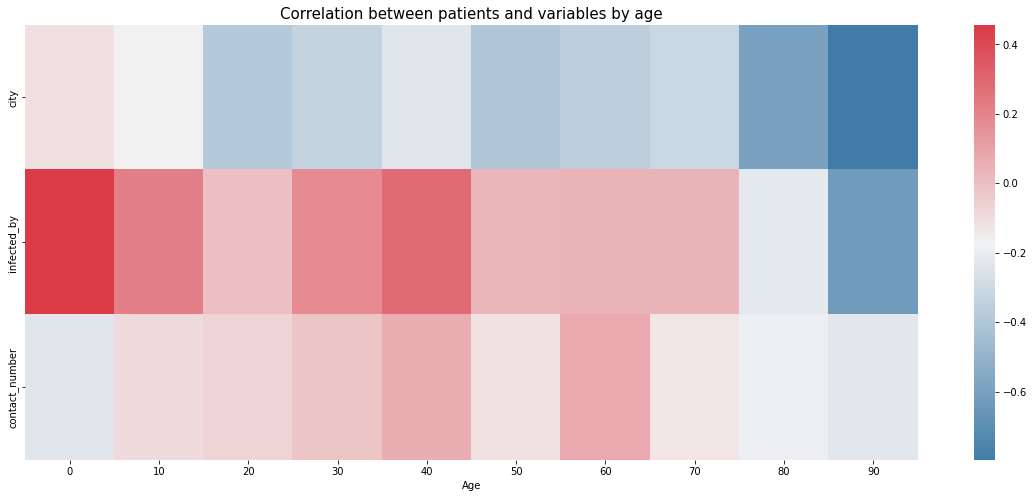

In [23]:
corr = []
for age in range(0,100,10):
    df = train1_1111[train1_1111.age==age]
    age_corr = df.corr()['patient_id']
    #age_corr = age_corr.drop(['age'])
    age_corr = age_corr.drop(['age','patient_id'])
    #age_corr = patient_id_corr.drop(['patient_id','province','city','infected_by','contact_number'])
    corr.append(age_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(0,100,10))

# 시각화
f, ax = plt.subplots(figsize=(20,8))
plt.title("Correlation between patients and variables by age", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('Age')
plt.show()